### Data Driven Exploration of Video Games - Sales and Scores

Examine the most sold games in a global perspective, then examine the games in terms of genre and platform, the genres according to the region, and the year of the most sold games are released and their publishers. Information about games, publishers and platforms obtained from public datasets.

##### Datasets
- VGCharts - Video Games Sales Dataset (2016 Updated 2021)
- Metacritic - Best-Selling Video Games of All Time (2020 Updated 2022)

##### Import Packages

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [113]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##### Import csv files

In [114]:
df = pd.read_csv("vgsales.csv")
df.head(10)

Rank                       Name Platform  Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006      Platform  Nintendo   
7     8                   Wii Play      Wii  2006          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26  
6     11.38      9.23      6.50         2.90         30.01  
7     14.03      9.20      2.93         2.85         29.02  
8     14.59      7.06      4.70         2.26         28.62  
9     26.93      0.63      0.28         0.47         28.31

In [115]:
len(df.Platform.unique())

33

In [116]:
len(df.Publisher.unique())

580

In [117]:
df.Year.unique()

array(['2006', '1985', '2008', '2009', '1996', '1989', '1984', '2005',
       '1999', '2007', '2010', '2013', '2004', '1990', '1988', '2002',
       '2001', '2011', '1998', '2015', '2012', '2014', '1992', '1997',
       '1993', '1994', '1982', '2003', '1986', '2000', nan, '1995',
       '2016', '1991', '1981', '1987', '1980', '1983', '2020',
       'Adventure', '2017'], dtype=object)

In [118]:
df.Year.isna().any()

True

In [119]:
df.dropna(how='any', subset=['Year'], inplace=True)

In [120]:
df.drop(df.index[df['Year'] == 'Adventure'], inplace=True)

In [121]:
df['Year'] = df['Year'].astype(int)

In [122]:
df.drop(columns='Rank', inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16325 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16325 non-null  object 
 1   Platform      16325 non-null  object 
 2   Year          16325 non-null  int32  
 3   Genre         16325 non-null  object 
 4   Publisher     16289 non-null  object 
 5   NA_Sales      16325 non-null  float64
 6   EU_Sales      16325 non-null  float64
 7   JP_Sales      16325 non-null  float64
 8   Other_Sales   16325 non-null  float64
 9   Global_Sales  16325 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


In [124]:
df2 = pd.read_csv("all_games.csv")
df2.head(10)

name        platform  release_date  \
0  The Legend of Zelda: Ocarina of Time     Nintendo 64          1998   
1              Tony Hawk's Pro Skater 2     PlayStation          2000   
2                   Grand Theft Auto IV   PlayStation 3          2008   
3                           SoulCalibur       Dreamcast          1999   
4                   Grand Theft Auto IV        Xbox 360          2008   
5                    Super Mario Galaxy             Wii          2007   
6                  Super Mario Galaxy 2             Wii          2010   
7                 Red Dead Redemption 2        Xbox One          2018   
8                    Grand Theft Auto V        Xbox One          2014   
9                    Grand Theft Auto V   PlayStation 3          2013   

                                             summary  meta_score user_review  
0  As a young boy, Link is tricked by Ganondorf, ...          99         9.1  
1  As most major publishers' development efforts ...          98         7.4  
2  [Metacritic's 2008 PS3 Game of the Year; Also ...          98         7.7  
3  This is a tale of souls and swords, transcendi...          98         8.4  
4  [Metacritic's 2008 Xbox 360 Game of the Year; ...          98         7.9  
5  [Metacritic's 2007 Wii Game of the Year] The u...          97         9.1  
6  Super Mario Galaxy 2, the sequel to the galaxy...          97         9.1  
7  Developed by the creators of Grand Theft Auto ...          97           8  
8  Grand Theft Auto 5 melds storytelling and game...          97         7.9  
9  Los Santos is a vast, sun-soaked metropolis fu...          97         8.3

In [125]:
len(df2.platform.unique())

22

In [126]:
df2['platform'].replace({' Nintendo 64':'N64',' PlayStation':'PS',
                        ' PlayStation 3':'PS3',' Dreamcast':'DC',
                        ' Xbox 360':'X360',' Wii':'Wii',' Xbox One':'XOne',
                        ' PC':'PC', ' Switch':'Switch',' PlayStation 2':'PS2',
                        ' PlayStation 4':'PS4',' GameCube':'GC',' Xbox':'Xbox',
                        ' Wii U':'WiiU',' Game Boy Advance':'GBA',' 3DS':'3DS',
                        ' Xbox Series X':'XX',' DS':'DS',' PSP':'PSP',
                        ' PlayStation Vita':'PSV',' PlayStation 5':'PS5', 
                        'Stadia':'SAT'}, inplace=True)

In [127]:
df2.platform.unique()

array(['N64', 'PS', 'PS3', 'DC', 'X360', 'Wii', 'XOne', 'PC', 'Switch',
       'PS2', 'PS4', 'GC', 'Xbox', 'WiiU', 'GBA', '3DS', 'XX', 'DS',
       'PSV', 'PS5', 'PSP', ' Stadia'], dtype=object)

In [128]:
df2.release_date.unique()

array([1998, 2000, 2008, 1999, 2007, 2010, 2018, 2014, 2013, 2021, 2017,
       2001, 2002, 2004, 2015, 1997, 2009, 2005, 2011, 2006, 2003, 2020,
       1996, 2019, 2012, 2016, 1995], dtype=int64)

In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  int64 
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(2), object(4)
memory usage: 881.4+ KB


In [130]:
df2.columns

Index(['name', 'platform', 'release_date', 'summary', 'meta_score',
       'user_review'],
      dtype='object')

##### Rename the columns

In [131]:
df2.columns = ['Name',
               'Platform',
               'Year',
               'Summary',
               'Critic_Score',
               'User_Score']

In [132]:
df2.head(5)

Name Platform  Year  \
0  The Legend of Zelda: Ocarina of Time      N64  1998   
1              Tony Hawk's Pro Skater 2       PS  2000   
2                   Grand Theft Auto IV      PS3  2008   
3                           SoulCalibur       DC  1999   
4                   Grand Theft Auto IV     X360  2008   

                                             Summary  Critic_Score User_Score  
0  As a young boy, Link is tricked by Ganondorf, ...            99        9.1  
1  As most major publishers' development efforts ...            98        7.4  
2  [Metacritic's 2008 PS3 Game of the Year; Also ...            98        7.7  
3  This is a tale of souls and swords, transcendi...            98        8.4  
4  [Metacritic's 2008 Xbox 360 Game of the Year; ...            98        7.9

### Data Merging

Conduct an outer merge of the two datasets - vgsales and all_games - and call the new dataframe df_combined. 

In [133]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [134]:
df_combined = df.merge(df2, how='outer')

In [135]:
df_combined.head(10)

Name Platform  Year         Genre Publisher  NA_Sales  \
0                 Wii Sports      Wii  2006        Sports  Nintendo     41.49   
1          Super Mario Bros.      NES  1985      Platform  Nintendo     29.08   
2             Mario Kart Wii      Wii  2008        Racing  Nintendo     15.85   
3          Wii Sports Resort      Wii  2009        Sports  Nintendo     15.75   
4   Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo     11.27   
5                     Tetris       GB  1989        Puzzle  Nintendo     23.20   
6      New Super Mario Bros.       DS  2006      Platform  Nintendo     11.38   
7                   Wii Play      Wii  2006          Misc  Nintendo     14.03   
8  New Super Mario Bros. Wii      Wii  2009      Platform  Nintendo     14.59   
9                  Duck Hunt      NES  1984       Shooter  Nintendo     26.93   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0     29.02      3.77         8.46         82.74   
1      3.58      6.81         0.77         40.24   
2     12.88      3.79         3.31         35.82   
3     11.01      3.28         2.96         33.00   
4      8.89     10.22         1.00         31.37   
5      2.26      4.22         0.58         30.26   
6      9.23      6.50         2.90         30.01   
7      9.20      2.93         2.85         29.02   
8      7.06      4.70         2.26         28.62   
9      0.63      0.28         0.47         28.31   

                                             Summary  Critic_Score User_Score  
0  Tennis (1-4 players): Players grab the control...          76.0        8.1  
1                                                NaN           NaN        NaN  
2  Mario Kart Wii comes with the intuitive Wii Wh...          82.0        8.4  
3  Wii Sports Resort is a collection of fun sport...          80.0        8.2  
4                                                NaN           NaN        NaN  
5                                                NaN           NaN        NaN  
6  The first new 2D Mario platformer since Super ...          89.0        8.5  
7                                                NaN           NaN        NaN  
8  New Super Mario Bros. Wii offers a combination...          87.0        8.3  
9                                                NaN           NaN        NaN

In [136]:
len(df_combined)

30406

In [137]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30406 entries, 0 to 30405
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          30406 non-null  object 
 1   Platform      30406 non-null  object 
 2   Year          30406 non-null  int64  
 3   Genre         16356 non-null  object 
 4   Publisher     16320 non-null  object 
 5   NA_Sales      16356 non-null  float64
 6   EU_Sales      16356 non-null  float64
 7   JP_Sales      16356 non-null  float64
 8   Other_Sales   16356 non-null  float64
 9   Global_Sales  16356 non-null  float64
 10  Summary       18687 non-null  object 
 11  Critic_Score  18801 non-null  float64
 12  User_Score    18801 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 3.2+ MB


In [138]:
df_combined['User_Score'].replace('tbd', 0, inplace=True)

In [139]:
df_combined.User_Score = df_combined['User_Score'].astype(float)

In [140]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30406 entries, 0 to 30405
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          30406 non-null  object 
 1   Platform      30406 non-null  object 
 2   Year          30406 non-null  int64  
 3   Genre         16356 non-null  object 
 4   Publisher     16320 non-null  object 
 5   NA_Sales      16356 non-null  float64
 6   EU_Sales      16356 non-null  float64
 7   JP_Sales      16356 non-null  float64
 8   Other_Sales   16356 non-null  float64
 9   Global_Sales  16356 non-null  float64
 10  Summary       18687 non-null  object 
 11  Critic_Score  18801 non-null  float64
 12  User_Score    18801 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 3.2+ MB


Using the dataframe df_combined, create a new dataframe called df_merged grouping by name and aggregating mean row values of all numeric variables.   

In [141]:
df_merged = df_combined.groupby('Name').agg({'mean'})

In [142]:
len(df_merged)

19037

### Data Cleaning

Clean df_combined by removing rows with NaN values.   

In [143]:
df_combined.isna().sum()

Name                0
Platform            0
Year                0
Genre           14050
Publisher       14086
NA_Sales        14050
EU_Sales        14050
JP_Sales        14050
Other_Sales     14050
Global_Sales    14050
Summary         11719
Critic_Score    11605
User_Score      11605
dtype: int64

Use the fillna method to fill NaN values for the Genre and Publisher categorical variables with unknown when the list of games was last updated.  

In [144]:
df_combined.Genre.fillna(value='Unknown', inplace=True)

In [145]:
df_combined.Publisher.fillna(value='Unknown', inplace=True)

In [146]:
df_combined.Summary.fillna(value="No summary of game provided", inplace=True)

Using the dropna command to drop any NaN value from rows that are mostly missing sales and scores data as a result of the outer merge. 

In [147]:
df_combined.dropna(how='any', subset=['NA_Sales','EU_Sales',
                                      'JP_Sales','Other_Sales',
                                      'Global_Sales'], inplace=True)

In [148]:
df_combined.dropna(how='any', subset=['Critic_Score','User_Score'], 
                   inplace=True)

In [149]:
df_combined.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Summary         0
Critic_Score    0
User_Score      0
dtype: int64

In [150]:
df_combined.isna().sum().sum()

0

Clean df_merged leaving rows of game copies that is missing sales and score values. 

In [151]:
df_merged.isna().sum()

Year          mean       0
NA_Sales      mean    7679
EU_Sales      mean    7679
JP_Sales      mean    7679
Other_Sales   mean    7679
Global_Sales  mean    7679
Critic_Score  mean    6783
User_Score    mean    6783
dtype: int64

In [152]:
df_merged.dropna(how='any', inplace=True)

In [153]:
df_merged.Year = df_merged.Year.round()

In [154]:
df_merged.reset_index(inplace=True)

In [155]:
df_merged.set_index('Name')

Year   NA_Sales  \
                                                      mean       mean   
Name                                                                    
.hack//Infection Part 1                             2002.0   0.490000   
.hack//Mutation Part 2                              2002.0   0.230000   
.hack//Outbreak Part 3                              2002.0   0.140000   
007 Racing                                          2000.0   0.300000   
007: Quantum of Solace                              2008.0   0.306667   
007: The World is not Enough                        2000.0   0.820000   
100 Classic Books                                   2009.0   0.130000   
101-in-1 Explosive Megamix                          2008.0   0.050000   
101-in-1 Sports Party Megamix                       2010.0   0.020000   
1701 A.D.                                           2006.0   0.000000   
18 Wheeler: American Pro Trucker                    2002.0   0.145000   
2002 FIFA World Cup                                 2002.0   0.130000   
2010 FIFA World Cup South Africa                    2010.0   0.235000   
2014 FIFA World Cup Brazil                          2014.0   0.145000   
24: The Game                                        2006.0   0.150000   
25 to Life                                          2006.0   0.235000   
300: March to Glory                                 2007.0   0.270000   
3D Dot Game Heroes                                  2010.0   0.360000   
4x4 EVO 2                                           2001.0   0.145000   
4x4 Evolution                                       2000.0   0.160000   
50 Cent: Blood on the Sand                          2009.0   0.110000   
50 Cent: Bulletproof                                2005.0   0.420000   
7 Days to Die                                       2016.0   0.025000   
7 Wonders of the Ancient World                      2007.0   0.085000   
7th Dragon III Code: VFD                            2016.0   0.030000   
A Boy and His Blob                                  2009.0   0.190000   
A Game of Thrones: Genesis                          2011.0   0.000000   
A Witch's Tale                                      2009.0   0.080000   
ATV Offroad Fury                                    2001.0   2.070000   
ATV Offroad Fury 2                                  2002.0   1.920000   
ATV Offroad Fury 3                                  2004.0   1.000000   
ATV Offroad Fury Pro                                2006.0   0.370000   
ATV Offroad Fury: Blazin' Trails                    2005.0   0.530000   
ATV Quad Power Racing 2                             2003.0   0.330000   
ATV: Quad Power Racing                              2001.0   0.380000   
Academy of Champions: Soccer                        2009.0   0.100000   
Ace Attorney Investigations: Miles Edgeworth        2010.0   0.270000   
Ace Combat 04: Shattered Skies                      2001.0   2.060000   
Ace Combat 2                                        1997.0   0.160000   
Ace Combat 5: The Unsung War                        2004.0   0.880000   
Ace Combat 6: Fires of Liberation                   2007.0   0.690000   
Ace Combat X: Skies of Deception                    2006.0   0.370000   
Ace Combat Zero: The Belkan War                     2006.0   0.150000   
Ace Combat: Assault Horizon                         2011.0   0.300000   
Ace Combat: Assault Horizon Legacy                  2011.0   0.100000   
Ace Combat: Joint Assault                           2010.0   0.060000   
Act of Aggression                                   2015.0   0.000000   
Action Bass                                         2000.0   0.640000   
Active Life: Extreme Challenge                      2009.0   0.150000   
Activision Anthology                                2002.0   0.140000   
Adrenalin Misfits                                   2010.0   0.120000   
Advance Guardian Heroes                             2004.0   0.030000   
Advance Wars                           

In [156]:
df_merged[df_merged.Name == 'Tetris']

Name    Year NA_Sales EU_Sales JP_Sales Other_Sales Global_Sales  \
                mean     mean     mean     mean        mean         mean   
3808  Tetris  1999.0   13.085    1.475    3.015       0.345        17.92   

     Critic_Score User_Score  
             mean       mean  
3808         82.5        7.5

Rename the columns in df_merged 

In [157]:
df_merged.columns = ['Name',
                     'Year',
                     'NA_Sales',
                     'EU_Sales',
                     'JP_Sales',
                     'Other_Sales',
                     'Global_Sales',
                     'Critic_Score',
                     'User_Score']

In [158]:
df_merged.head(10)

Name    Year  NA_Sales  EU_Sales  JP_Sales  \
0        .hack//Infection Part 1  2002.0  0.490000     0.380  0.260000   
1         .hack//Mutation Part 2  2002.0  0.230000     0.180  0.200000   
2         .hack//Outbreak Part 3  2002.0  0.140000     0.110  0.170000   
3                     007 Racing  2000.0  0.300000     0.200  0.000000   
4         007: Quantum of Solace  2008.0  0.306667     0.225  0.006667   
5   007: The World is not Enough  2000.0  0.820000     0.365  0.010000   
6              100 Classic Books  2009.0  0.130000     0.520  0.000000   
7     101-in-1 Explosive Megamix  2008.0  0.050000     0.130  0.000000   
8  101-in-1 Sports Party Megamix  2010.0  0.020000     0.000  0.000000   
9                      1701 A.D.  2006.0  0.000000     0.250  0.000000   

   Other_Sales  Global_Sales  Critic_Score  User_Score  
0     0.130000      1.270000          75.0        8.30  
1     0.060000      0.680000          76.0        8.50  
2     0.040000      0.460000          70.0        8.20  
3     0.030000      0.530000          51.0        4.90  
4     0.113333      0.653333          63.8        5.42  
5     0.045000      1.235000          61.0        6.70  
6     0.020000      0.670000          70.0        6.50  
7     0.020000      0.200000          46.0        0.00  
8     0.000000      0.030000          41.0        0.00  
9     0.050000      0.300000          79.0        7.70

In [159]:
len(df_merged)

4575

In [160]:
df_merged.shape

(4575, 9)

In [161]:
df_combined.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Summary         0
Critic_Score    0
User_Score      0
dtype: int64

In [162]:
df_merged.isna().sum().sum()

0

### Statistical Measurements

To better illustrate some of the later data visualizations, randomly sample 500 rows.

In [163]:
dfv = df_merged.sample(500, random_state=1)

In [164]:
dfv.drop(columns='Year', inplace=True)

In [165]:
dfv.head(3)

Name  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
3108  Rise of the Kasai      0.09    0.0700       0.0         0.02   
4166   Toy Story Mania!      1.06    0.6700       0.0         0.18   
3202              SSX 3      0.40    0.1775       0.0         0.06   

      Global_Sales  Critic_Score  User_Score  
3108          0.19          68.0        6.70  
4166          1.92          49.0        6.30  
3202          0.64          85.0        8.25

In [166]:
dfv.describe()

NA_Sales    EU_Sales    JP_Sales  Other_Sales  Global_Sales  \
count  500.000000  500.000000  500.000000   500.000000    500.000000   
mean     0.353937    0.191815    0.086886     0.081635      0.716538   
std      0.717375    0.445927    0.258903     0.366855      1.479659   
min      0.000000    0.000000    0.000000     0.000000      0.010000   
25%      0.050000    0.020000    0.000000     0.010000      0.108750   
50%      0.120000    0.050000    0.000000     0.020000      0.250000   
75%      0.320000    0.160625    0.043750     0.056875      0.676250   
max      6.850000    5.090000    2.130000     7.530000     14.980000   

       Critic_Score  User_Score  
count    500.000000  500.000000  
mean      69.749133    6.847390  
std       13.568280    2.062282  
min       26.500000    0.000000  
25%       61.000000    6.487500  
50%       71.000000    7.537500  
75%       80.000000    8.100000  
max       97.000000    9.200000

In [167]:
dfv.corr()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
NA_Sales      1.000000  0.791555  0.647460     0.448675      0.947143   
EU_Sales      0.791555  1.000000  0.562028     0.294673      0.856868   
JP_Sales      0.647460  0.562028  1.000000     0.336079      0.741143   
Other_Sales   0.448675  0.294673  0.336079     1.000000      0.613381   
Global_Sales  0.947143  0.856868  0.741143     0.613381      1.000000   
Critic_Score  0.332576  0.301655  0.243248     0.192712      0.343620   
User_Score    0.177841  0.151535  0.205299     0.107597      0.195432   

              Critic_Score  User_Score  
NA_Sales          0.332576    0.177841  
EU_Sales          0.301655    0.151535  
JP_Sales          0.243248    0.205299  
Other_Sales       0.192712    0.107597  
Global_Sales      0.343620    0.195432  
Critic_Score      1.000000    0.514251  
User_Score        0.514251    1.000000

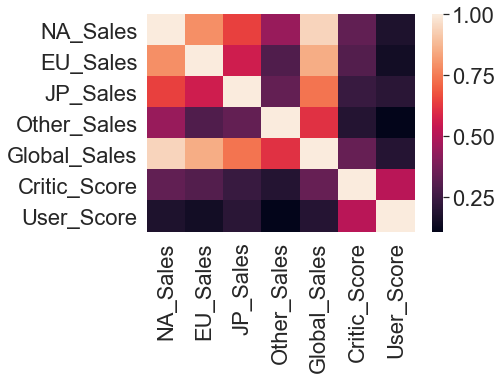

In [168]:
sns.heatmap(dfv.corr());

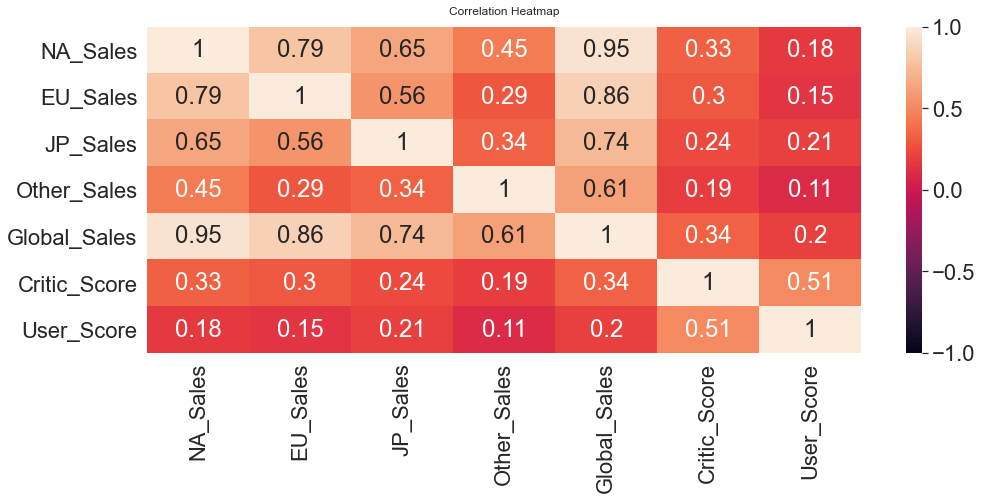

In [169]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dfv.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In our heatmap, we see that Global Sales has the highest correlation with NA Sales; however, it is clear that all regional sales (NA, EU, JP) total to global sales so they are clearly correlated. 

### Data Science Exploration

##### The broad scope to our research question can be broken down into certain attributes as a game can be defined before or after its release.

Alluding to the factors that helps our team examine the most sold games include the genre of said games, whether it is a one-off or part of a franchise, platform influence, publisher, which year was it released within, sales of the game outside of the US, etc.

In [170]:
df_combined.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Summary',
       'Critic_Score', 'User_Score'],
      dtype='object')

In [171]:
df_merged.columns

Index(['Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'User_Score'],
      dtype='object')

##### What are the best selling games in global sales?


In [172]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4575 entries, 0 to 4574
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4575 non-null   object 
 1   Year          4575 non-null   float64
 2   NA_Sales      4575 non-null   float64
 3   EU_Sales      4575 non-null   float64
 4   JP_Sales      4575 non-null   float64
 5   Other_Sales   4575 non-null   float64
 6   Global_Sales  4575 non-null   float64
 7   Critic_Score  4575 non-null   float64
 8   User_Score    4575 non-null   float64
dtypes: float64(8), object(1)
memory usage: 321.8+ KB


In [173]:
df_merged.nlargest(3, columns='Global_Sales')

Name    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
4406         Wii Sports  2006.0     41.49     29.02      3.77         8.46   
2134     Mario Kart Wii  2008.0     15.85     12.88      3.79         3.31   
4408  Wii Sports Resort  2009.0     15.75     11.01      3.28         2.96   

      Global_Sales  Critic_Score  User_Score  
4406         82.74          76.0         8.1  
2134         35.82          82.0         8.4  
4408         33.00          80.0         8.2

From our table we see that Wii staple games published by Nintendo, on average, were the best selling games of all time.

##### Trend of total worldwide sales of games by each publisher


In [174]:
df_year = df_merged.groupby('Year')[['NA_Sales','EU_Sales',
                                    'JP_Sales','Global_Sales']].sum()

In [175]:
df_year.nlargest(3, columns=['NA_Sales','EU_Sales',
                                    'JP_Sales','Global_Sales'])

NA_Sales    EU_Sales   JP_Sales  Global_Sales
Year                                                   
2006.0  179.659893  100.164381  49.214929    368.658869
2008.0  173.862262  105.417643  49.275667    369.289262
2009.0  134.503452   83.432167  21.440333    268.318298

In the mid-2000s was when global sales was highest skyrocketing to around 370 million sales from 2006 to 2008. We see the change mainly came from the exponential increase in NA sales. 

(1994.0, 2017.0)

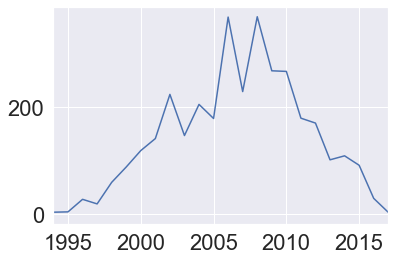

In [176]:
plt.plot(df_year.Global_Sales, 'b')
plt.xlim(1994, 2017)
plt.show()

In our line plot, we see that the sales figures steadily rose from the 1990s into the 2000s, then it exponential rose over 350 million sales in 2006 and again in 2008 before drastically falling.

Our group believed these yearly trends in game sales were heavily influenced by total worldwide sales of the top five publishers over the years.

In [177]:
df_pub = df_combined.groupby('Publisher').agg({'Global_Sales':'sum'})

In [178]:
df_pub.nlargest(5, columns='Global_Sales')

Global_Sales
Publisher                                
Nintendo                           728.72
Electronic Arts                    716.16
Activision                         447.85
Sony Computer Entertainment        326.62
Take-Two Interactive               316.35

In [179]:
df1_year = df_combined[df_combined.Publisher == 'Nintendo']\
.groupby('Year').sum()

In [180]:
df2_year = df_combined[df_combined.Publisher == 'Electronic Arts']\
.groupby('Year').sum()

In [181]:
df3_year = df_combined[df_combined.Publisher == 'Activision']\
.groupby('Year').sum()

In [182]:
df4_year = df_combined[df_combined.Publisher == 'Sony Computer Entertainment']\
.groupby('Year').sum()

In [183]:
df5_year = df_combined[df_combined.Publisher == 'Take-Two Interactive']\
.groupby('Year').sum()

(1996.0, 2017.0)

(0.0, 150.0)

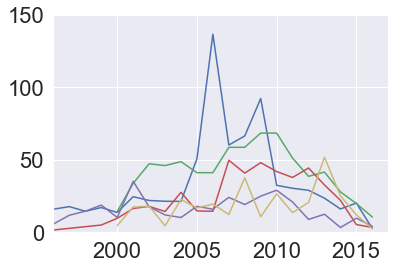

In [184]:
plt.plot(df1_year.Global_Sales, 'b')
plt.plot(df2_year.Global_Sales, 'g')
plt.plot(df3_year.Global_Sales, 'r')
plt.plot(df4_year.Global_Sales, 'm')
plt.plot(df5_year.Global_Sales, 'y')
plt.xlim(1996, 2017)
plt.ylim(0,150)
plt.show()

We see that Nintendo total worldwide sales of games after 2005 contributed to the spike in sales in 2006 and 2008. Outside of Nintendo games, other top publishers had a steady rise in sales. 

##### Total games sold per console

The consoles success has a huge impact on publisher success so our team wanted to determine which console had the most sold games. 


In [185]:
df_combined.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'N64', 'PS', 'PC',
       'PSP', 'GC', 'WiiU', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [186]:
df_console = df_combined.groupby('Platform').agg({'Name':'count'})

In [187]:
df_console.reset_index(inplace=True)
df_console.set_index('Platform')

Name
Platform      
3DS         88
DC          10
DS         364
GBA        243
GC         324
N64         44
PC         555
PS         104
PS2        853
PS3        578
PS4        136
PSP        268
PSV         47
Wii        319
WiiU        50
X360       665
XOne       103

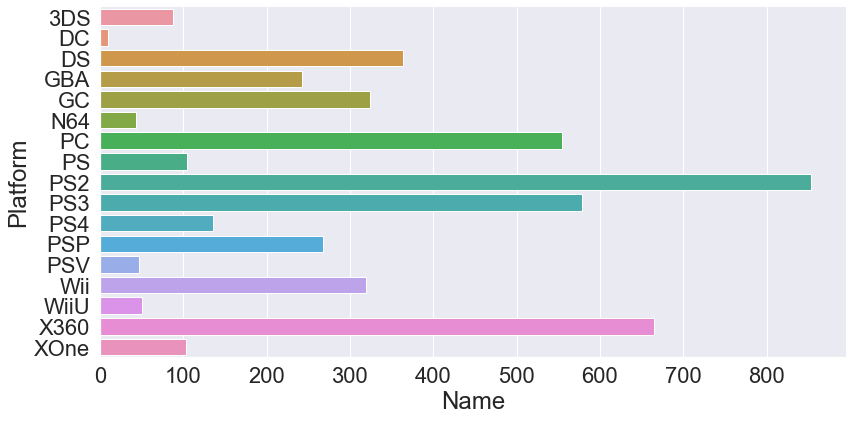

In [188]:
sns.catplot(y='Platform', data=df_console, x='Name', aspect=2, 
            kind='bar', height=6)

We see that the top platforms are the non-Nintendo consoles; first, the PS2, followed by the XBOX 360, and the PS3 with PC games not far behind in our dataset.

##### Total worldwide sales of games from top consoles

In the modern gaming space, the PlayStation 2, 3, and XBox 360 have the most video games released. Let's visualize the top selling modern games of these platforms.

In [189]:
df_combined.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'N64', 'PS', 'PC',
       'PSP', 'GC', 'WiiU', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [190]:
df2_console = df_combined[df_combined.Platform == 'PS2']\
.groupby('Name').agg('mean')

In [191]:
df2_console = df2_console.nlargest(10, columns='Global_Sales')

In [192]:
df2_console.reset_index(inplace=True)
df2_console.set_index('Name')

Year  NA_Sales  EU_Sales  JP_Sales  \
Name                                                                      
Grand Theft Auto: San Andreas        2004      9.43      0.40      0.41   
Grand Theft Auto: Vice City          2002      8.41      5.49      0.47   
Gran Turismo 3: A-Spec               2001      6.85      5.09      1.87   
Grand Theft Auto III                 2001      6.99      4.51      0.30   
Final Fantasy X                      2001      2.91      2.07      2.73   
Need for Speed Underground           2003      3.27      2.83      0.08   
Need for Speed Underground 2         2004      2.71      3.02      0.08   
Kingdom Hearts                       2002      3.64      1.20      1.49   
Metal Gear Solid 2: Sons of Liberty  2001      2.45      2.01      0.87   
Final Fantasy XII                    2006      1.88      0.00      2.33   

                                     Other_Sales  Global_Sales  Critic_Score  \
Name                                                                           
Grand Theft Auto: San Andreas              10.57         20.81          95.0   
Grand Theft Auto: Vice City                 1.78         16.15          95.0   
Gran Turismo 3: A-Spec                      1.16         14.98          95.0   
Grand Theft Auto III                        1.30         13.10          97.0   
Final Fantasy X                             0.33          8.05          92.0   
Need for Speed Underground                  1.02          7.20          85.0   
Need for Speed Underground 2                1.09          6.90          82.0   
Kingdom Hearts                              0.07          6.40          85.0   
Metal Gear Solid 2: Sons of Liberty         0.72          6.05          96.0   
Final Fantasy XII                           1.74          5.95          92.0   

                                     User_Score  
Name                                             
Grand Theft Auto: San Andreas               9.1  
Grand Theft Auto: Vice City                 8.8  
Gran Turismo 3: A-Spec                      8.4  
Grand Theft Auto III                        8.4  
Final Fantasy X                             8.9  
Need for Speed Underground                  8.6  
Need for Speed Underground 2                8.6  
Kingdom Hearts                              8.8  
Metal Gear Solid 2: Sons of Liberty         8.8  
Final Fantasy XII                           7.6

In [193]:
name_ps2 = df2_console['Name']
sales_ps2 = df2_console['Global_Sales']

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'PS2 Games Total Worldwide Sales')

Text(0, 0.5, 'Name')

Text(0.5, 0, 'Sales')

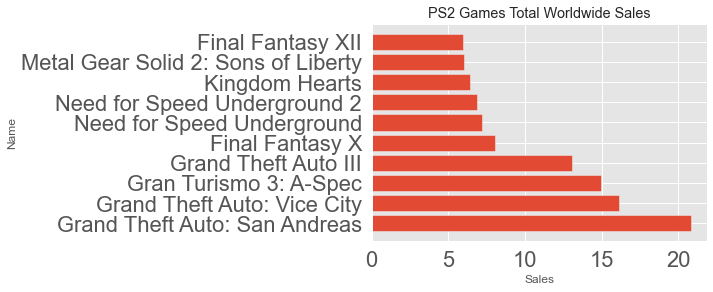

In [194]:
plt.style.use('ggplot')

plt.barh(name_ps2, sales_ps2)
plt.title('PS2 Games Total Worldwide Sales')
plt.ylabel('Name')
plt.xlabel('Sales')
plt.show()

When observing the most sold games on the PS2, the Grand Theft Auto franchise of games before the PS3 remain the four highest sold games on the PS2 followed with Final Fantasy X. 

In [195]:
df3_console = df_combined[df_combined.Platform == 'PS3']\
.groupby('Name').agg('mean')

In [196]:
df3_console = df3_console.nlargest(10, columns='Global_Sales')

In [197]:
df3_console.reset_index(inplace=True)
df3_console.set_index('Name')

Year  NA_Sales  EU_Sales  JP_Sales  \
Name                                                                 
Grand Theft Auto V              2013      7.01      9.27      0.97   
Call of Duty: Black Ops II      2012      4.99      5.88      0.65   
Call of Duty: Modern Warfare 3  2011      5.54      5.82      0.49   
Call of Duty: Black Ops         2010      5.98      4.44      0.48   
Gran Turismo 5                  2010      2.96      4.88      0.81   
Call of Duty: Modern Warfare 2  2009      4.99      3.69      0.38   
Grand Theft Auto IV             2008      4.76      3.76      0.44   
Call of Duty: Ghosts            2013      4.09      3.73      0.38   
FIFA Soccer 13                  2012      1.06      5.05      0.13   
Battlefield 3                   2011      2.85      2.93      0.35   

                                Other_Sales  Global_Sales  Critic_Score  \
Name                                                                      
Grand Theft Auto V                     4.14         21.40          97.0   
Call of Duty: Black Ops II             2.52         14.03          83.0   
Call of Duty: Modern Warfare 3         1.62         13.46          88.0   
Call of Duty: Black Ops                1.83         12.73          88.0   
Gran Turismo 5                         2.12         10.77          84.0   
Call of Duty: Modern Warfare 2         1.63         10.69          94.0   
Grand Theft Auto IV                    1.62         10.57          98.0   
Call of Duty: Ghosts                   1.38          9.59          71.0   
FIFA Soccer 13                         2.01          8.24          88.0   
Battlefield 3                          1.10          7.23          85.0   

                                User_Score  
Name                                        
Grand Theft Auto V                     8.3  
Call of Duty: Black Ops II             5.7  
Call of Duty: Modern Warfare 3         3.3  
Call of Duty: Black Ops                6.8  
Gran Turismo 5                         7.8  
Call of Duty: Modern Warfare 2         6.6  
Grand Theft Auto IV                    7.7  
Call of Duty: Ghosts                   2.8  
FIFA Soccer 13                         6.6  
Battlefield 3                          7.5

In [198]:
name_ps3 = df3_console['Name']
sales_ps3 = df3_console['Global_Sales']

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'PS3 Games Total Worldwide Sales')

Text(0, 0.5, 'Name')

Text(0.5, 0, 'Sales')

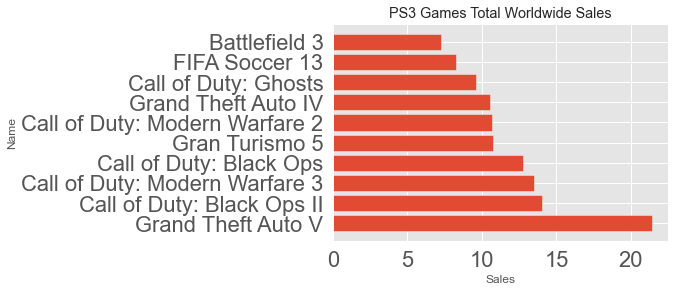

In [199]:
plt.style.use('ggplot')

plt.barh(name_ps3, sales_ps3)
plt.title('PS3 Games Total Worldwide Sales')
plt.ylabel('Name')
plt.xlabel('Sales')
plt.show()

When observing the most sold games on the PS3, despite Grand Theft Auto V remaining the most sold game, we see more representation from the Call of Duty franchise of games.  

In [200]:
dfX_console = df_combined[df_combined.Platform == 'X360']\
.groupby('Name').agg('mean')

In [201]:
dfX_console = dfX_console.nlargest(10, columns='Global_Sales')

In [202]:
dfX_console.reset_index(inplace=True)
dfX_console.set_index('Name')

Year  NA_Sales  EU_Sales  JP_Sales  \
Name                                                                 
Kinect Adventures!              2010     14.97      4.94      0.24   
Grand Theft Auto V              2013      9.63      5.31      0.06   
Call of Duty: Modern Warfare 3  2011      9.03      4.28      0.13   
Call of Duty: Black Ops         2010      9.67      3.73      0.11   
Call of Duty: Black Ops II      2012      8.25      4.30      0.07   
Call of Duty: Modern Warfare 2  2009      8.52      3.63      0.08   
Halo 3                          2007      7.97      2.83      0.13   
Grand Theft Auto IV             2008      6.76      3.10      0.14   
Call of Duty: Ghosts            2013      6.72      2.63      0.04   
Halo: Reach                     2010      7.03      1.98      0.08   

                                Other_Sales  Global_Sales  Critic_Score  \
Name                                                                      
Kinect Adventures!                     1.67         21.82          61.0   
Grand Theft Auto V                     1.38         16.38          97.0   
Call of Duty: Modern Warfare 3         1.32         14.76          88.0   
Call of Duty: Black Ops                1.13         14.64          87.0   
Call of Duty: Black Ops II             1.12         13.73          83.0   
Call of Duty: Modern Warfare 2         1.29         13.51          94.0   
Halo 3                                 1.21         12.14          94.0   
Grand Theft Auto IV                    1.03         11.02          98.0   
Call of Duty: Ghosts                   0.82         10.21          73.0   
Halo: Reach                            0.78          9.88          91.0   

                                User_Score  
Name                                        
Kinect Adventures!                     6.3  
Grand Theft Auto V                     8.3  
Call of Duty: Modern Warfare 3         3.5  
Call of Duty: Black Ops                6.6  
Call of Duty: Black Ops II             5.3  
Call of Duty: Modern Warfare 2         6.6  
Halo 3                                 8.1  
Grand Theft Auto IV                    7.9  
Call of Duty: Ghosts                   2.7  
Halo: Reach                            8.4

In [203]:
name_x360 = dfX_console['Name']
sales_x360 = dfX_console['Global_Sales']

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'XBox 360 Games Total Worldwide Sales')

Text(0, 0.5, 'Name')

Text(0.5, 0, 'Sales')

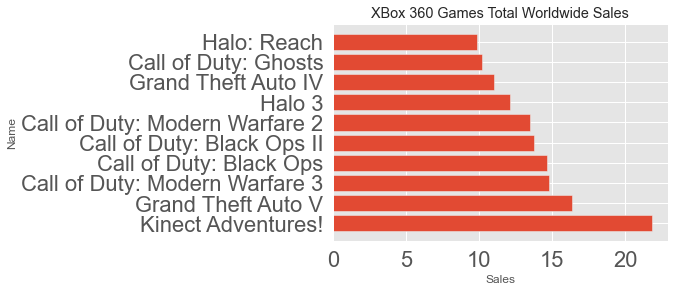

In [204]:
plt.style.use('ggplot')

plt.barh(name_x360, sales_x360)
plt.title('XBox 360 Games Total Worldwide Sales')
plt.ylabel('Name')
plt.xlabel('Sales')
plt.show()

In [205]:
df_combined[df_combined.Name == 'Kinect Adventures!'].head()

Name Platform  Year Genre               Publisher  NA_Sales  \
15  Kinect Adventures!     X360  2010  Misc  Microsoft Game Studios     14.97   

    EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
15      4.94      0.24         1.67         21.82   

                                              Summary  Critic_Score  \
15  Kinect Adventures is a compilation of games fo...          61.0   

    User_Score  
15         6.3

When observing the most sold games on the XBox 360, the best game sold was Kinect Adventures even though the Kinect was largely considered a failure.

##### Critic and User preference for games released on top consoles

Our group believed we could see a platform's further influence on total worldwide sales of a game by observing the relationship scores against console. 

##### Critic Score vs Console

In this violin plot our group visualized the top consoles sold, including the most popular Nintendo consoles, against critic scores.

<Figure size 720x504 with 0 Axes>

[Text(0.5, 0, 'Console'),
 Text(0, 0.5, 'Critic Score'),
 Text(0.5, 1.0, 'Best-Selling Consoles: Critic Scores')]

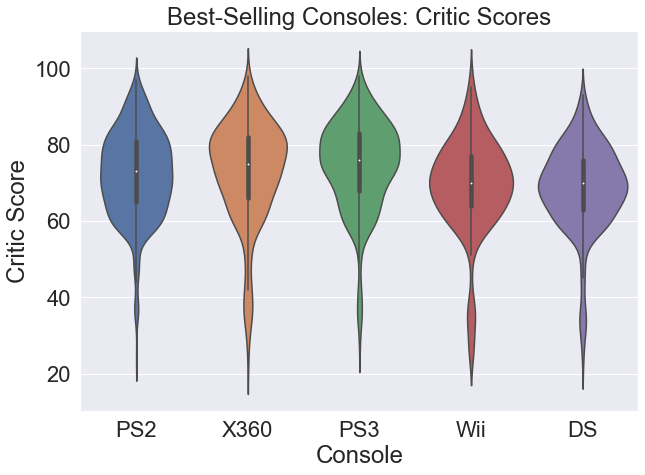

In [206]:
# create and display plot of critic score vs console
plt.figure(figsize=(10,7))
sns.set(font_scale=2)
ax = sns.violinplot(x='Platform', y='Critic_Score', data=df_combined, order=['PS2','X360', 'PS3', 'Wii', 'DS'])
ax.set(xlabel='Console', ylabel='Critic Score', title='Best-Selling Consoles: Critic Scores')
plt.show()

We see that the mean critic score is higher for the PS3 and Xbox 360, followed by the PS2 then the Wii and DS. This indicates a similar pattern in rating and sales of console games.

##### User Score vs Console

In this violin plot our group visualized the top consoles sold, including the most popular Nintendo consoles, against user scores.

<Figure size 720x504 with 0 Axes>

[Text(0.5, 0, 'Console'),
 Text(0, 0.5, 'User Score'),
 Text(0.5, 1.0, 'Best-Selling Consoles: User Scores')]

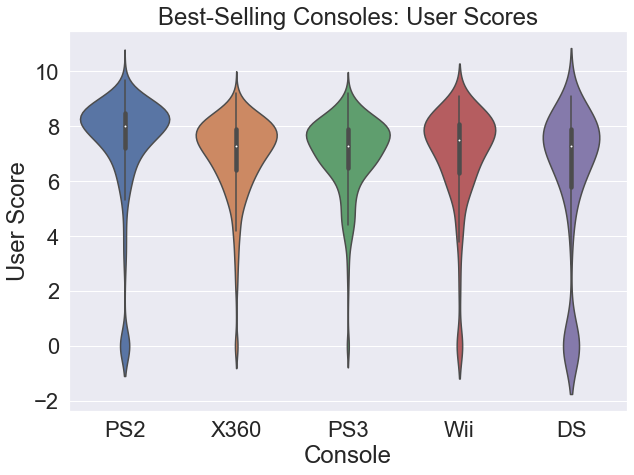

In [207]:
# create and display plot of user score vs console
plt.figure(figsize=(10,7))
sns.set(font_scale=2)
ax = sns.violinplot(x='Platform', y='User_Score', data=df_combined, order=['PS2','X360', 'PS3', 'Wii', 'DS'])
ax.set(xlabel='Console', ylabel='User Score', title='Best-Selling Consoles: User Scores')
plt.show()

We see that mean user score is higher for PS2 followed by the Xbox 360, PS3, Wii, and DS all being similarly rated suggests a lower variability in scores and preference for one console. 

##### Total worldwide sale figures per genre

The genre of the game tells our group what regular gamers prefer based on the highest number of games sold. 

In [208]:
df_combined.Genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Shooter',
       'Fighting', 'Simulation', 'Role-Playing', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [209]:
df_genre = df_combined.groupby('Genre').agg({'Global_Sales':'sum'})

In [210]:
df_genre.reset_index(inplace=True)
df_genre.set_index('Genre')

Global_Sales
Genre                     
Action             1018.92
Adventure            65.40
Fighting            212.72
Misc                299.74
Platform            365.66
Puzzle               45.31
Racing              378.69
Role-Playing        322.62
Shooter             667.38
Simulation          160.19
Sports              721.91
Strategy             60.30

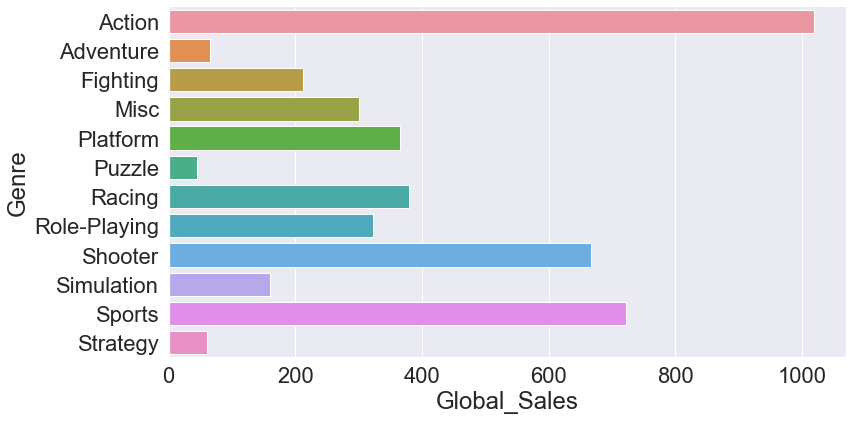

In [211]:
sns.catplot(y='Genre', data=df_genre, x='Global_Sales', aspect=2, 
            kind='bar', height=6)

In [212]:
df_genre.nlargest(3, columns='Global_Sales')

Genre  Global_Sales
0    Action       1018.92
10   Sports        721.91
8   Shooter        667.38

We see that the Action genre have the largest total worldwide sales by far, over 1 billion games sold, followed with Sports and Shooter genre in our dataset.

##### Critic and User preference for genre of games 

To observe the yearly trend in genre of games by critic and regular gamers, our group decided to visualize it in a categorical bar plot.

In [213]:
df_combined.Genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Shooter',
       'Fighting', 'Simulation', 'Role-Playing', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [214]:
df_genre = df_combined.groupby(['Genre','Year']).agg({'mean'})

In [215]:
df_genre.head(10)

NA_Sales  EU_Sales  JP_Sales Other_Sales Global_Sales  \
                 mean      mean      mean        mean         mean   
Genre  Year                                                          
Action 1996  2.170000  1.565000  0.620000    0.485000     4.840000   
       1997  0.390000  0.090000  0.170000    0.060000     0.710000   
       1998  3.053333  1.730000  1.416667    0.283333     6.483333   
       1999  1.226000  0.864000  0.516000    0.114000     2.724000   
       2000  0.723571  0.471429  0.164286    0.065000     1.424286   
       2001  0.744483  0.518276  0.170690    0.125517     1.568621   
       2002  0.601489  0.360638  0.033404    0.106383     1.111915   
       2003  0.302540  0.190794  0.045079    0.055238     0.593016   
       2004  0.476923  0.163654  0.064615    0.279423     0.985385   
       2005  0.326000  0.164706  0.037529    0.068471     0.598353   

            Critic_Score User_Score  
                    mean       mean  
Genre  Year                          
Action 1996    91.000000   8.750000  
       1997    90.000000   8.300000  
       1998    94.000000   9.166667  
       1999    88.800000   8.440000  
       2000    76.714286   7.621429  
       2001    72.310345   7.317241  
       2002    72.148936   6.891489  
       2003    69.222222   7.214286  
       2004    68.903846   7.084615  
       2005    71.011765   7.602353

In [216]:
df_genre.columns = ['NA_Sales',
                     'EU_Sales',
                     'JP_Sales',
                     'Other_Sales',
                     'Global_Sales',
                     'Critic_Score',
                     'User_Score']

In [217]:
df_genre.reset_index(inplace=True)
df_genre.set_index(['Genre','Year'])

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
Genre        Year                                                            
Action       1996  2.170000  1.565000  0.620000     0.485000      4.840000   
             1997  0.390000  0.090000  0.170000     0.060000      0.710000   
             1998  3.053333  1.730000  1.416667     0.283333      6.483333   
             1999  1.226000  0.864000  0.516000     0.114000      2.724000   
             2000  0.723571  0.471429  0.164286     0.065000      1.424286   
             2001  0.744483  0.518276  0.170690     0.125517      1.568621   
             2002  0.601489  0.360638  0.033404     0.106383      1.111915   
             2003  0.302540  0.190794  0.045079     0.055238      0.593016   
             2004  0.476923  0.163654  0.064615     0.279423      0.985385   
             2005  0.326000  0.164706  0.037529     0.068471      0.598353   
             2006  0.318209  0.155373  0.043433     0.073134      0.595373   
             2007  0.370208  0.172083  0.021354     0.101354      0.670625   
             2008  0.527843  0.329510  0.023824     0.139608      1.020196   
             2009  0.379208  0.224653  0.040297     0.093168      0.736139   
             2010  0.438172  0.260645  0.040860     0.097097      0.851290   
             2011  0.427500  0.360435  0.038587     0.117174      0.944457   
             2012  0.412614  0.370000  0.050909     0.126250      0.970000   
             2013  0.708438  0.597188  0.092969     0.208281      1.612031   
             2014  0.344390  0.383415  0.034878     0.127561      0.902683   
             2015  0.298800  0.314600  0.047200     0.097800      0.759000   
             2016  0.124737  0.111053  0.051579     0.031579      0.320000   
Adventure    1997  1.520000  0.820000  0.000000     0.100000      2.430000   
             2000  0.120000  0.085000  0.050000     0.020000      0.275000   
             2001  0.138000  0.076000  0.036000     0.020000      0.270000   
             2002  0.187647  0.113529  0.092353     0.031176      0.422353   
             2003  0.060000  0.046000  0.000000     0.012000      0.120000   
             2004  0.194545  0.081818  0.043636     0.010000      0.332727   
             2005  0.138182  0.083636  0.048182     0.038182      0.307273   
             2006  0.155333  0.037333  0.000000     0.013333      0.207333   
             2007  0.690000  0.436667  0.101111     0.167778      1.395556   
             2008  0.134286  0.065714  0.007857     0.020000      0.231429   
             2009  0.121538  0.060000  0.000000     0.019231      0.203077   
             2010  0.237778  0.266667  0.008889     0.085556      0.627778   
             2011  0.336000  0.254667  0.038667     0.085333      0.716667   
             2012  0.038750  0.067500  0.000000     0.022500      0.130000   
             2013  0.100000  0.078571  0.062857     0.078571      0.445714   
             2014  0.035000  0.053333  0.003333     0.015000      0.106667   
             2015  0.166667  0.290000  0.011667     0.065000      0.535000   
             2016  0.015000  0.020000  0.006667     0.005000      0.048333   
Fighting     1996  2.260000  1.890000  1.360000     0.230000      5.740000   
             1997  0.390000  0.270000  0.430000     0.080000      1.160000   
             1998  1.680000  1.140000  0.750000     0.155000      3.720000   
             1999  1.475000  0.300000  1.155000     0.020000      2.945000   
             2000  0.514444  0.428889  0.113333     0.084444      1.273333   
             2001  0.775556  0.344444  0.206667     0.096667      1.424444   
             2002  0.399130  0.168261  0.062609     0.037826      0.669565   
             2003  0.481875  0.243750  0.049375     0.080625      0.855625   
             2004  0.397333  0.191333  0.054667     0.066667      0.710667   
             2005  0.370769  0.188462  0.107692     0.079231      0.746923   
             2006  0.466667  0.088000  0.

In [218]:
df_genre['binned_year'] = pd.cut(df_genre['Year'],\
                        bins=[1996,2000,2006,2011,2016])

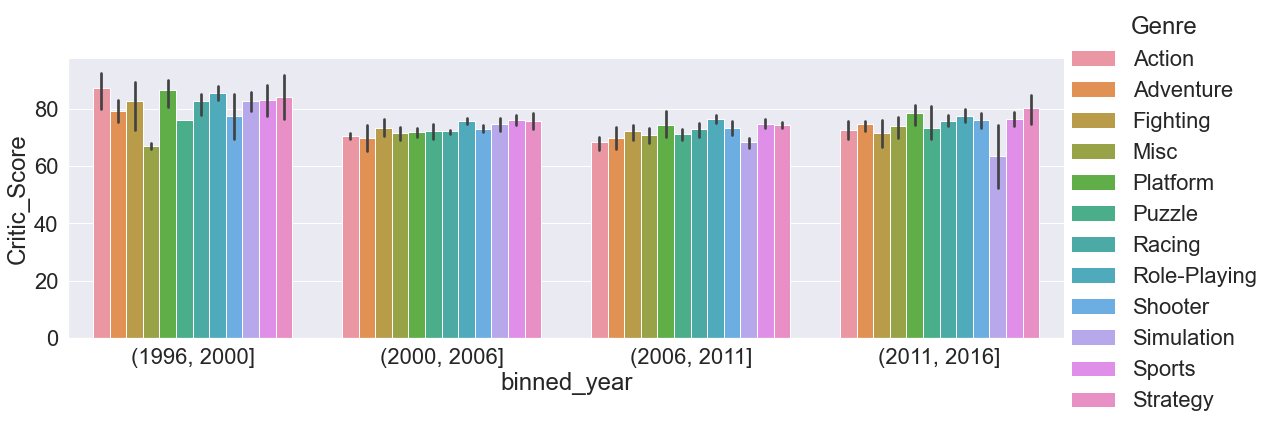

In [219]:
sns.catplot(x='binned_year', y='Critic_Score', data=df_genre, aspect=3, 
            kind='bar', hue='Genre')

In our categorical bar plot where we evaluated genres against user score using binned years, we can see consistent scores for each genre from 2000 on. 

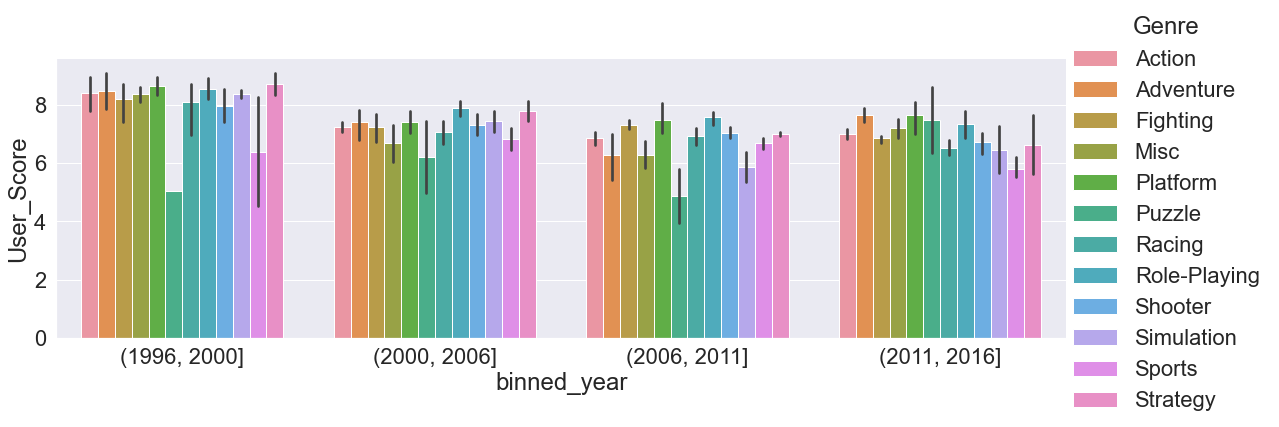

In [220]:
sns.catplot(x='binned_year', y='User_Score', data=df_genre, aspect=3, 
            kind='bar', hue='Genre')

In our categorical bar plot where we evaluated genres against user score using binned years, we can see a steady decline in user scores and then it plateaus from 2000 on.   

##### User Score vs Top Genres

In this violin plot our group visualized the top genres according to user scores specifically Action, Sports, and Shooter genres.

<Figure size 504x360 with 0 Axes>

[Text(0, 0.5, 'User Score'),
 Text(0.5, 1.0, 'Highest-Rated Genres by Users'),
 Text(0.5, 0, '')]

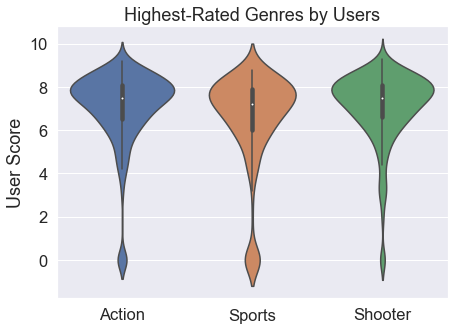

In [221]:
# create and display plot of user rating vs top genres
plt.figure(figsize=(7,5))
sns.set(font_scale=1.5)
ax = sns.violinplot(x='Genre', y='User_Score', data=df_combined, order=['Action', 'Sports', 'Shooter'])
ax.set(ylabel='User Score', title='Highest-Rated Genres by Users', xlabel = '')
plt.show()

When evaluating our violin plots of the top 3 genres against user scores, we can see that, on average, all three have a relatively equal score.  

##### Critic Score vs Top Genres

In this violin plot our group visualized the top genres according to critic scores specifically Action, Sports, and Shooter genres.

<Figure size 504x360 with 0 Axes>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Critic Score'),
 Text(0.5, 1.0, 'Highest-Rated Genres by Critics')]

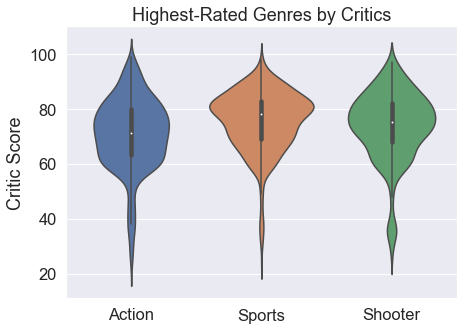

In [222]:
# create and display plot of critic rating vs top genres
plt.figure(figsize=(7,5))
sns.set(font_scale=1.5)
ax = sns.violinplot(x='Genre', y='Critic_Score', data=df_combined, order=['Action', 'Sports', 'Shooter'])
ax.set(xlabel='', ylabel='Critic Score', title='Highest-Rated Genres by Critics')
plt.show()

When evaluating our violin plots of the top 3 genres against critic scores, we can see that, on average, sports and shooter games are higher scored.  

##### Scores on Global Sales

Our team observed critic and regular gamers preferences for consoles and genres. To answer our overarching research question, we brought our attention back to gamers' scores on sales figures. 

##### Metacritic Score on total worldwide sales

[(0.0, 17.5)]

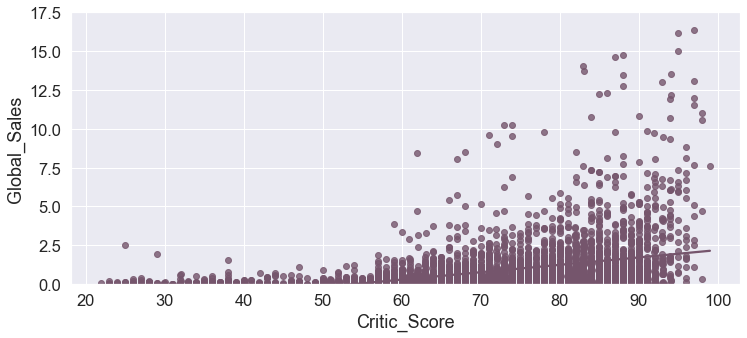

In [223]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=df_combined, 
            ci=None, color="#75556c", x_jitter=.02).set(ylim=(0, 17.5))

When evaluating critic score on global sales in the whole dataset, we can see a clear positive correlative between the two variables.

[(0.0, 4.0), (50.0, 95.0)]

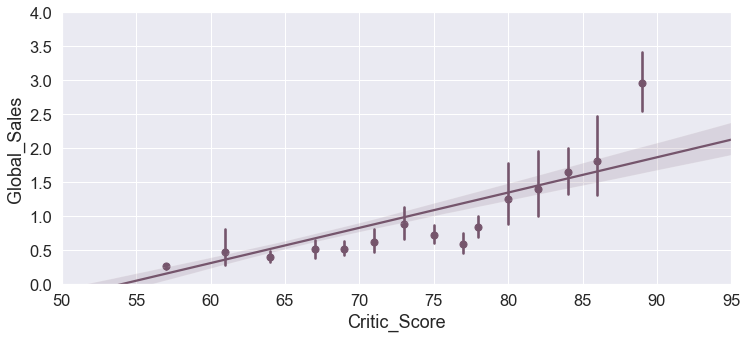

In [224]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=df_combined\
            .loc[df_combined.Year >= 2008],truncate=True, x_bins=15, 
            color="#75556c").set(ylim=(0, 4), xlim=(50, 95))

When evaluating critic score on global sales in a subset of years, we can see that the slope gets steeper past 80. Once a game gets a high critic score, every additional point has a higher impact.

##### User Score on total worldwide sales

[(0.0, 17.5)]

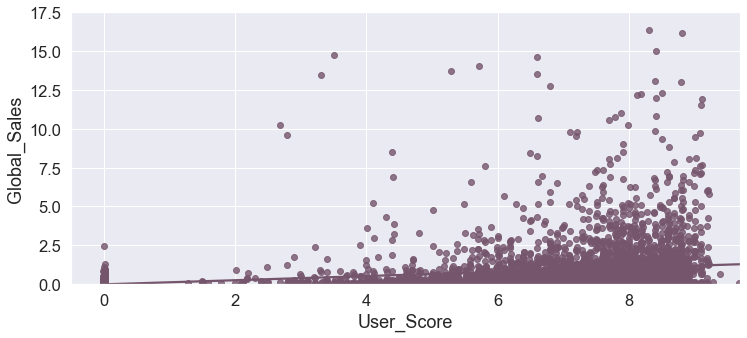

In [225]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="User_Score", y="Global_Sales", data=df_combined, 
            ci=None, color="#75556c", x_jitter=.02).set(ylim=(0, 17.5))

When evaluating critic score on global sales in the whole dataset, we can see a less positive correlative between the two variables.

[(0.0, 3.0), (0.0, 9.0)]

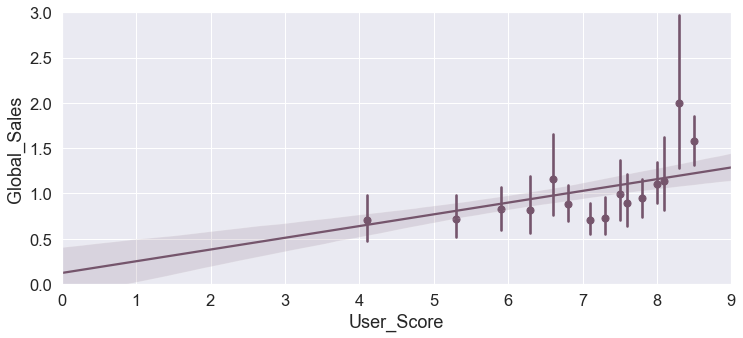

In [226]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="User_Score", y="Global_Sales", data=df_combined\
            .loc[df_combined.Year >= 2008],truncate=True, x_bins=15, 
            color="#75556c").set(ylim=(0, 3), xlim=(0, 9))

When evaluating user score on global sales in a subset of years, we can see that the slope slightly lowers past 6. Once a game gets a high user score, every additional point has a lower impact.

### Clustering

Analysis goal: identify clusters of games published by Nintendo that are similar based upon their regional sales in the combined data set.

In [227]:
df_combined.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Summary',
       'Critic_Score', 'User_Score'],
      dtype='object')

In [228]:
df_pub2 = df_combined.groupby('Publisher').agg({'Global_Sales':'sum'})
df_pub2.nlargest(3, columns='Global_Sales')

Global_Sales
Publisher                    
Nintendo               728.72
Electronic Arts        716.16
Activision             447.85

In [229]:
len(df_combined.Publisher.unique())

201

In [230]:
df_combined = pd.get_dummies(columns=['Publisher'], data=df_combined)

In [231]:
df_combined.head(10)

Name Platform  Year     Genre  NA_Sales  \
0                      Wii Sports      Wii  2006    Sports     41.49   
2                  Mario Kart Wii      Wii  2008    Racing     15.85   
3               Wii Sports Resort      Wii  2009    Sports     15.75   
6           New Super Mario Bros.       DS  2006  Platform     11.38   
8       New Super Mario Bros. Wii      Wii  2009  Platform     14.59   
11                  Mario Kart DS       DS  2005    Racing      9.81   
14                   Wii Fit Plus      Wii  2009    Sports      9.09   
15             Kinect Adventures!     X360  2010      Misc     14.97   
16             Grand Theft Auto V      PS3  2013    Action      7.01   
17  Grand Theft Auto: San Andreas      PS2  2004    Action      9.43   

    EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0      29.02      3.77         8.46         82.74   
2      12.88      3.79         3.31         35.82   
3      11.01      3.28         2.96         33.00   
6       9.23      6.50         2.90         30.01   
8       7.06      4.70         2.26         28.62   
11      7.57      4.13         1.92         23.42   
14      8.59      2.53         1.79         22.00   
15      4.94      0.24         1.67         21.82   
16      9.27      0.97         4.14         21.40   
17      0.40      0.41        10.57         20.81   

                                              Summary  Critic_Score  \
0   Tennis (1-4 players): Players grab the control...          76.0   
2   Mario Kart Wii comes with the intuitive Wii Wh...          82.0   
3   Wii Sports Resort is a collection of fun sport...          80.0   
6   The first new 2D Mario platformer since Super ...          89.0   
8   New Super Mario Bros. Wii offers a combination...          87.0   
11  Race and battle with up to eight karts at once...          91.0   
14  Wii Fit Plus is the new, enhanced version of t...          80.0   
15  Kinect Adventures is a compilation of games fo...          61.0   
16  Los Santos is a vast, sun-soaked metropolis fu...          97.0   
17  [Metacritic's 2004 PS2 Game of the Year] Five ...          95.0   

    User_Score  Publisher_1C Company  Publisher_2D Boy  Publisher_3DO  \
0          8.1                     0                 0              0   
2          8.4                     0                 0              0   
3          8.2                     0                 0              0   
6          8.5                     0                 0              0   
8          8.3                     0                 0              0   
11         8.7                     0                 0              0   
14         7.5                     0                 0              0   
15         6.3                     0                 0              0   
16         8.3                     0                 0              0   
17         9.1                     0                 0              0   

    Publisher_505 Games  Publisher_AQ Interactive  \
0                     0                         0   
2                     0                         0   
3                     0                         0   
6                     0                         0   
8                     0                         0   
11                    0                         0   
14                    0                         0   
15                    0                         0   
16                    0                         0   
17                    0                         0   

    Publisher_Acclaim Entertainment  Publisher_Ackkstudios  \
0                                 0                      0   
2                                 0                      0   
3                                 0                      0   
6                                 0                      0   
8                                 0                      0   
11                                0                      0   
14                                0             

In [232]:
df_combined.drop(columns=['Name','Platform',
                          'Genre','Summary'],inplace=True)

##### Apply the KMeans clustering algorithm to identify 2 clusters of games

In [233]:
from sklearn.cluster import KMeans

In [234]:
clu = KMeans(n_clusters=2, random_state=0)

In [235]:
clu

KMeans(n_clusters=2, random_state=0)

In [236]:
clu.fit(df_combined)

KMeans(n_clusters=2, random_state=0)

In [237]:
clu.labels_

array([0, 0, 0, ..., 0, 1, 1])

##### Generate summary information describing the identified clusters' characteristics

In [238]:
df_copy = df_combined.copy()

In [239]:
df_copy['cluster'] = clu.labels_

In [240]:
df_copy.groupby('cluster').mean()

Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
cluster                                                                         
0        2007.504295  0.635669  0.391550  0.086815     0.136174      1.255251   
1        2007.175779  0.219004  0.125232  0.024716     0.043975      0.414752   

         Critic_Score  User_Score  Publisher_1C Company  Publisher_2D Boy  \
cluster                                                                     
0           80.894775    7.596779              0.000716          0.000358   
1           62.023505    6.050996              0.000511          0.000000   

         Publisher_3DO  Publisher_505 Games  Publisher_AQ Interactive  \
cluster                                                                 
0             0.001432             0.005727                  0.000358   
1             0.002044             0.011753                  0.000000   

         Publisher_Acclaim Entertainment  Publisher_Ackkstudios  \
cluster                                                           
0                               0.008590               0.000358   
1                               0.015841               0.000000   

         Publisher_Activision  Publisher_Activision Blizzard  \
cluster                                                        
0                    0.074445                       0.000358   
1                    0.074093                       0.000000   

         Publisher_Agatsuma Entertainment  Publisher_Agetec  \
cluster                                                       
0                                0.000000          0.000358   
1                                0.000511          0.000000   

         Publisher_Aksys Games  Publisher_Arc System Works  \
cluster                                                      
0                     0.000716                    0.000000   
1                     0.000000                    0.000511   

         Publisher_Ascaron Entertainment GmbH  Publisher_Aspyr  \
cluster                                                          
0                                    0.000358         0.000358   
1                                    0.000511         0.001022   

         Publisher_Astragon  Publisher_Atari  Publisher_Atlus  \
cluster                                                         
0                  0.000000         0.020401         0.004653   
1                  0.000511         0.031170         0.001022   

         Publisher_Avalon Interactive  Publisher_Avanquest  \
cluster                                                      
0                            0.000000             0.000000   
1                            0.001022             0.000511   

         Publisher_BAM! Entertainment  Publisher_Banpresto  \
cluster                                                      
0                            0.000716             0.000000   
1                            0.004599             0.001022   

         Publisher_Bethesda Softworks  Publisher_Black Bean Games  \
cluster                                                             
0                            0.008590                    0.000358   
1                            0.006643                    0.000511   

         Publisher_Black Label Games  Publisher_Blue Byte  \
cluster                                                     
0                           0.000000             0.000358   
1                           0.000511             0.000000   

         Publisher_Brash Entertainment  Publisher_CCP  Publisher_Capcom  \
cluster                                                                   
0                             0.000000       0.000000          0.032570   
1                             0.000511       0.000511          0.033725   

         Publisher_City Interactive  Publisher_Codemasters  \
cluster                                                      
0                          0.000000               0.020759   
1                          0

##### The clustering analysis identified a cluster of Nintendo released games (cluster 1) that are sold more in North America (NA) than the other cluster in 0.

##### Investigate a finding of the clustering analysis - propensity of a Nintendo published game to be sold in NA. 

In [241]:
df_copy['Nintendo'] = df_copy.Publisher_Nintendo > 0.05

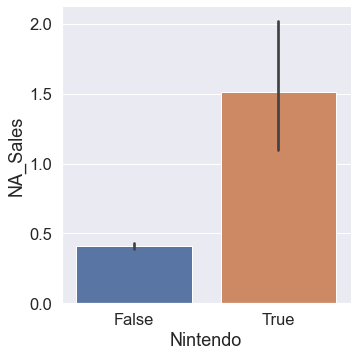

In [242]:
sns.catplot(x='Nintendo', y='NA_Sales', data=df_copy, kind='bar')

When investigating Nintendo games that are sold within the NA region, we can see their is a strong natural tendency for their games to be sold in NA. 

In [243]:
bins = pd.IntervalIndex.from_tuples([(1996,2000),(2000,2008),(2008,2012),(2012,2017)])
df_copy['binned_year'] = pd.cut(df_copy['Year'],bins=bins)

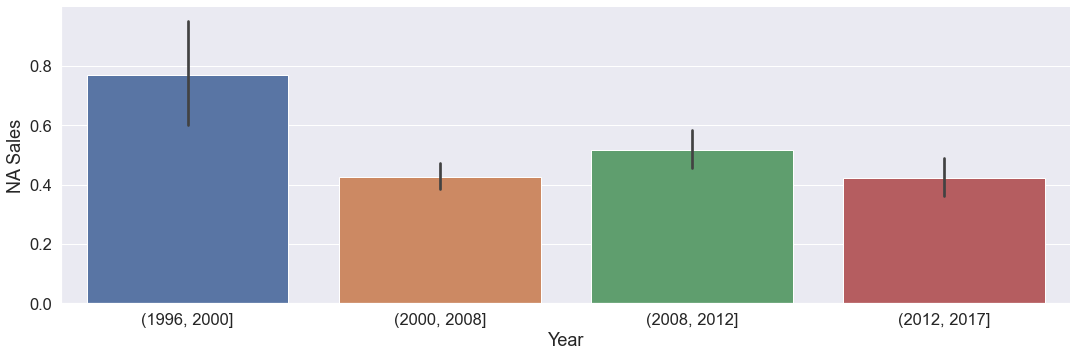

In [244]:
ax = sns.catplot(y='NA_Sales', x='binned_year', data=df_copy, 
            kind='bar', aspect=3)
ax.set(xlabel='Year', ylabel='NA Sales')
plt.show()

In this bar plot, we can see that NA sales of the games on our list, on average, peaked early on, but fell close to half a million in sales after 2000 and remained consistent since then. 

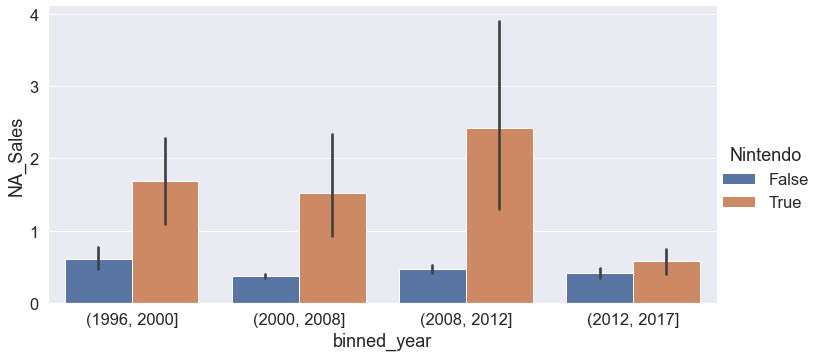

In [245]:
sns.catplot(x='binned_year', y='NA_Sales', hue='Nintendo', 
            data=df_copy, kind='bar', aspect=2)

Re-evaluating the sales figure with Nintendo games, we can see that Nintendo games are selling, on average, much higher than non-Nintendo games in the NA region until 2012. 

##### Investigate a finding of the clustering analysis - propensity of a Nintendo published game to be sold in Europe. 

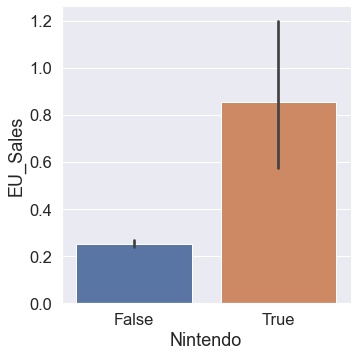

In [246]:
sns.catplot(x='Nintendo', y='EU_Sales', data=df_copy, kind='bar')

When investigating Nintendo games that are sold in another western region, Europe. We see that there is a similar natural tendency for their games to be sold in Europe. 

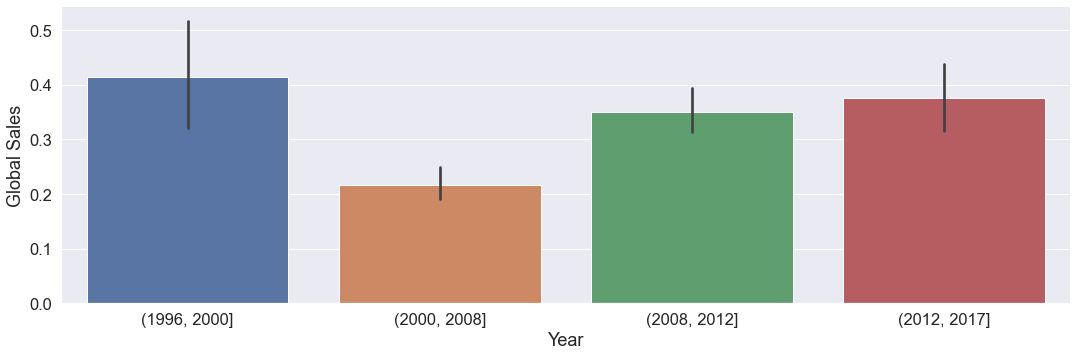

In [247]:
ax = sns.catplot(y='EU_Sales', x='binned_year', data=df_copy, 
            kind='bar', aspect=3)
ax.set(xlabel='Year', ylabel='Global Sales')
plt.show()

In this bar plot, we can see that European sales, on average, saw the same decline in sales after 2000, but rose closer to the peak of the first bin after 2008.  

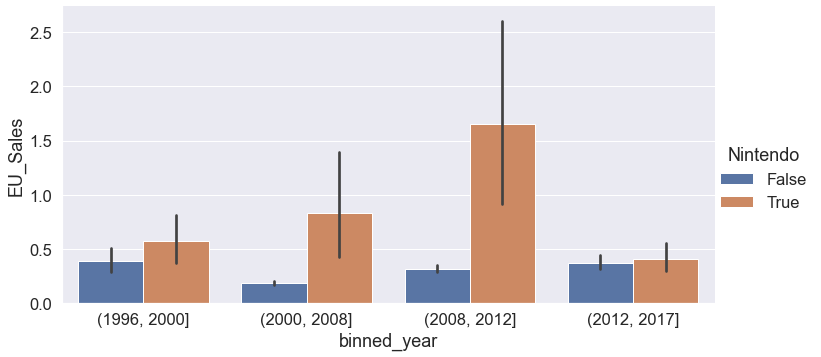

In [248]:
sns.catplot(x='binned_year', y='EU_Sales', hue='Nintendo', 
            data=df_copy, kind='bar', aspect=2)

Re-evaluating the sales figure of Nintendo games, we can see that their games are selling, on average, more than other publishers but at a much closer distance in the first and last bin. 

##### Investigate a finding of the clustering analysis - propensity of a Nintendo published game to be sold in Japan. 

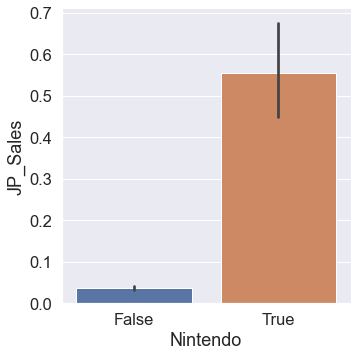

In [249]:
sns.catplot(x='Nintendo', y='JP_Sales', data=df_copy, kind='bar')

Where the Nintendo headquarter is located in Japan, there are much more sold games within the Japan region as there is a stronger natural tendency for their games to be sold. 

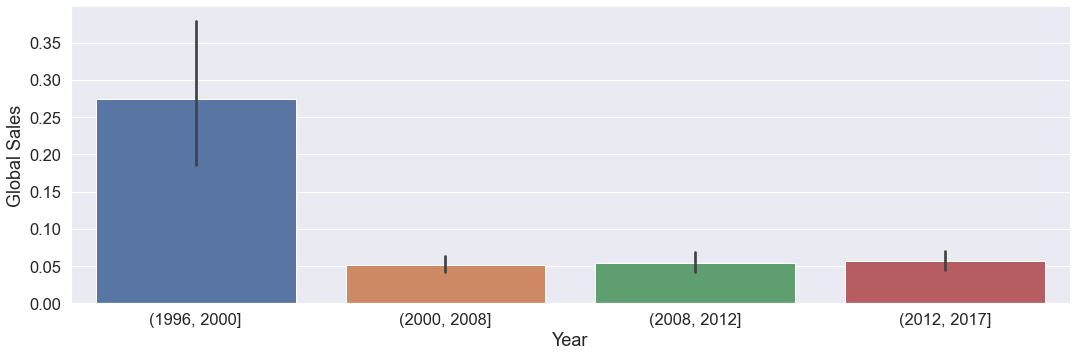

In [250]:
ax = sns.catplot(y='JP_Sales', x='binned_year', data=df_copy, 
            kind='bar', aspect=3)
ax.set(xlabel='Year', ylabel='Global Sales')
plt.show()

In this initial bar plot, we can see that Japan sales, on average, had a more drastic decline in average sales and a much lower peak sales of games in our list. 

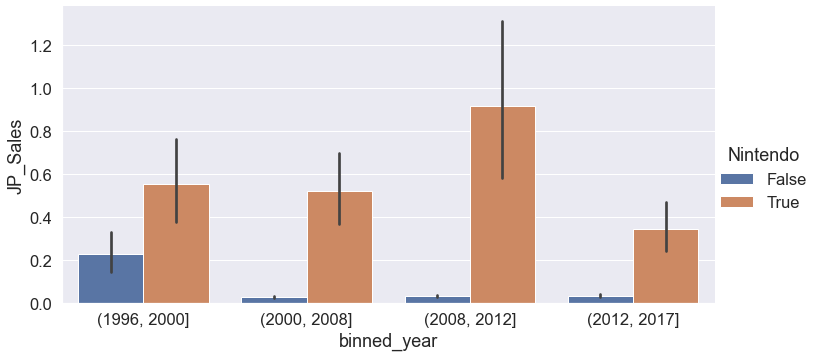

In [251]:
sns.catplot(x='binned_year', y='JP_Sales', hue='Nintendo', 
            data=df_copy, kind='bar', aspect=2)

Re-evaluating the sales figure with Nintendo games, we can see that their games are sold at a much higher frequency in Japan, and non-Nintendo games after 2000 are rarely sold. 

In [252]:
df_copy.groupby('Nintendo').agg({'NA_Sales':['size','mean'],
                                 'EU_Sales':'mean',
                                 'JP_Sales':'mean'})

NA_Sales            EU_Sales  JP_Sales
             size      mean      mean      mean
Nintendo                                       
False        4519  0.410188  0.252416  0.035931
True          232  1.512974  0.855172  0.554138

Comparing the sales of all games in our list, the sample size is much smaller for published Nintendo games. In the NA and EU region, the western region have a higher mean sales of Nintendo games than in smaller region of Japan.  

##### Compare clustering methods based upon silhouette score

In [253]:
df_merged.drop(columns=['Name','Year'], inplace=True)

In [254]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,6):
    print ('k = %d ' % k)
    clus = [KMeans(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    for cl in clus:
        res = cl.fit(df_merged)
        sil = metrics.silhouette_score(df_merged, res.labels_)
        print (str(cl)[:5] + ' with k = ' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl
            bestK = k
print('***********************************************')
print ('Best algorithm is... ' + str(bestCl)[:6] + '  with k = ' +str(bestK) )
print('**********************')
print ('With Silhouette Score ' + str(bestSil))

k = 2 
KMean with k = 2: 0.5471
Agglo with k = 2: 0.5043
k = 3 
KMean with k = 3: 0.4963
Agglo with k = 3: 0.4834
k = 4 
KMean with k = 4: 0.4619
Agglo with k = 4: 0.3901
k = 5 
KMean with k = 5: 0.4329
Agglo with k = 5: 0.3804
***********************************************
Best algorithm is... KMeans  with k = 2
**********************
With Silhouette Score 0.5471147943408368


With a silhouette score of 0.55, we can see that 2 clusters provides the best fit. However, it is far from a perfect cluster score at 1.00 suggesting that our clustering model can be improved on.  